<a href="https://colab.research.google.com/github/katemartian/LHoutputsManuscript/blob/master/LHoutputs_opto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> LH-opto

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory
%cd /content/drive/MyDrive/!lab/Manuscripts/LHoutputs/rawdata/

/content/drive/MyDrive/!lab/Manuscripts/LHoutputs/rawdata


In [ ]:
%run FiberPhotometryDataAnalysis_elife.ipynb

All Fiber Photometry functions are ready to use


In [ ]:
filename = 'LH-opto.h5'

In [ ]:
chr2_mice = ['LHA93','LHA94','LHA95','LHA96','LHA97','LHA98','LHA99','LHA100','LHA101']
eyfp_mice = ['LHA35','LHA37','LHA38','LHA39','LHA40','LHA61','LHA104','LHA105','LHA106']
outputs = ['LHA-LHb','LHA-VTA','LHA-DRN']
tests = ['RTTP','SCT','OFT','TST']

# Save to HDF

In [ ]:
folders = {'RTPP': ['/content/drive/My Drive/!lab/!Opto/2019-10 LHA-opto-3 RTPP2/raw/',
                    '/content/drive/My Drive/!lab/!Opto/2018-10-04 LHA-ChR2 RTPP/'],
            'SCT': ['/content/drive/My Drive/!lab/!Opto/2019-11-30 LHA-opto-3 ChR2 Sucrose3/raw/',
                    '/content/drive/My Drive/!lab/!Opto/2019-10 LHA-opto-3 Sucrose2/raw_eYFP/',
                    '/content/drive/My Drive/!lab/!Opto/2018-10-03 LHA-ChR2 Sucrose/'],
            'TST': ['/content/drive/My Drive/!lab/!Opto/2019-08 LHA-opto-3 TST/raw/',
                    '/content/drive/My Drive/!lab/!Opto/2018-10-26 LHA-ChR2 OFT/'],
            'OFT': ['/content/drive/My Drive/!lab/!Opto/2019-08 LHA-opto-3 OFT/raw/',
                    '/content/drive/My Drive/!lab/!Opto/2018-10-26 LHA-ChR2 OFT/']}

#### Set attributes

In [ ]:
with h5py.File(filename,'a') as f:
  f.attrs['ChR2-mice'] = chr2_mice
  f.attrs['eYFP-mice'] = eyfp_mice
  f.attrs['outputs'] = outputs
  f.attrs['tests'] = tests
  f.attrs['good target'] = [['LHA93','LHA-LHb'],
                            ['LHA94','LHA-LHb'],
                            ['LHA95','LHA-LHb'],
                            ['LHA96','LHA-LHb'],
                            ['LHA97','LHA-LHb'],
                            ['LHA98','LHA-LHb'],
                            ['LHA101','LHA-LHb'],
                            ['LHA93','LHA-VTA'],
                            ['LHA94','LHA-VTA'],
                            ['LHA95','LHA-VTA'],
                            ['LHA96','LHA-VTA'],
                            ['LHA97','LHA-VTA'],
                            ['LHA98','LHA-VTA'],
                            ['LHA99','LHA-VTA'],
                            ['LHA100','LHA-VTA'],
                            ['LHA101','LHA-VTA'],
                            ['LHA93','LHA-DRN'],
                            ['LHA94','LHA-DRN'],
                            ['LHA95','LHA-DRN'],
                            ['LHA96','LHA-DRN'],
                            ['LHA97','LHA-DRN'],
                            ['LHA99','LHA-DRN'],
                            ['LHA100','LHA-DRN'],
                            ['LHA101','LHA-DRN'],
                            ['LHA35','LHA-LHb'],
                            ['LHA37','LHA-LHb'],
                            ['LHA38','LHA-LHb'],
                            ['LHA39','LHA-LHb'],
                            ['LHA40','LHA-LHb'],
                            ['LHA61','LHA-LHb'],
                            ['LHA104','LHA-LHb'],
                            ['LHA105','LHA-LHb'],
                            ['LHA106','LHA-LHb'],
                            ['LHA35','LHA-VTA'],
                            ['LHA37','LHA-VTA'],
                            ['LHA38','LHA-VTA'],
                            ['LHA39','LHA-VTA'],
                            ['LHA40','LHA-VTA'],
                            ['LHA61','LHA-VTA'],
                            ['LHA104','LHA-VTA'],
                            ['LHA105','LHA-VTA'],
                            ['LHA106','LHA-VTA'],
                            ['LHA35','LHA-DRN'],
                            ['LHA37','LHA-DRN'],
                            ['LHA38','LHA-DRN'],
                            ['LHA39','LHA-DRN'],
                            ['LHA40','LHA-DRN'],
                            ['LHA61','LHA-DRN'],
                            ['LHA104','LHA-DRN'],
                            ['LHA105','LHA-DRN'],
                            ['LHA106','LHA-DRN']]

#### RTPP

In [ ]:
rtpp_full_file_names = []
for folder in folders['RTPP']:
  files = find_files(folder,['.csv'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in chr2_mice+eyfp_mice:
      rtpp_full_file_names.append(folder+f)
#rtpp_full_file_names

In [ ]:
with h5py.File(filename,'a') as f:

  for file_ in rtpp_full_file_names:

    file_split = file_.split('/') 
    name = file_split[-1]
    folder = '/'.join(file_split[:-1])

    sepname = name.split('_')      
    mouse = sepname[0]
    output = 'LHA-'+sepname[1]

    if mouse in chr2_mice:
      group = 'ChR2'
    elif mouse in eyfp_mice:
      group = 'eYFP'
  
    df = pd.read_csv(file_)

    try:
      blue_laser_on = sum(df['Blue laser active'])
      green_laser_on = sum(df['Green laser active'])
      if blue_laser_on > 0:
        laser = np.array(df['Blue laser active'])
      else:
        continue
    except:
      blue_laser_on = sum(df['Laser blue active'])
      green_laser_on = sum(df['Laser green active'])
      if blue_laser_on > 0:
        laser = np.array(df['Laser blue active'])
      else:
        continue


    time_ = np.array(df['Time'])
    corridor = np.array(df['In Corridor'])
    chamber1 = np.array(df['In Chamber 1'])
    chamber2 = np.array(df['In Chamber 2'])


    saveToHDF(f,'RTPP/raw/'+group+'/'+output+'/'+mouse+'/time',time_)
    saveToHDF(f,'RTPP/raw/'+group+'/'+output+'/'+mouse+'/laser',laser)
    saveToHDF(f,'RTPP/raw/'+group+'/'+output+'/'+mouse+'/chamber1',chamber1)
    saveToHDF(f,'RTPP/raw/'+group+'/'+output+'/'+mouse+'/chamber2',chamber2)
    saveToHDF(f,'RTPP/raw/'+group+'/'+output+'/'+mouse+'/corridor',corridor)

    print(mouse,group,output)

LHA61 eYFP LHA-DRN
LHA61 eYFP LHA-VTA
LHA94 ChR2 LHA-LHb
LHA94 ChR2 LHA-DRN
LHA94 ChR2 LHA-VTA
LHA93 ChR2 LHA-LHb
LHA93 ChR2 LHA-VTA
LHA95 ChR2 LHA-DRN
LHA93 ChR2 LHA-DRN
LHA95 ChR2 LHA-LHb
LHA96 ChR2 LHA-DRN
LHA96 ChR2 LHA-LHb
LHA96 ChR2 LHA-VTA
LHA95 ChR2 LHA-VTA
LHA98 ChR2 LHA-DRN
LHA97 ChR2 LHA-DRN
LHA98 ChR2 LHA-LHb
LHA97 ChR2 LHA-VTA
LHA97 ChR2 LHA-LHb
LHA98 ChR2 LHA-VTA
LHA99 ChR2 LHA-LHb
LHA100 ChR2 LHA-LHb
LHA100 ChR2 LHA-DRN
LHA99 ChR2 LHA-VTA
LHA99 ChR2 LHA-DRN
LHA100 ChR2 LHA-VTA
LHA101 ChR2 LHA-DRN
LHA101 ChR2 LHA-LHb
LHA101 ChR2 LHA-VTA
LHA104 eYFP LHA-DRN
LHA105 eYFP LHA-VTA
LHA106 eYFP LHA-LHb
LHA37 eYFP LHA-VTA
LHA35 eYFP LHA-DRN
LHA38 eYFP LHA-VTA
LHA35 eYFP LHA-LHb
LHA40 eYFP LHA-LHb
LHA39 eYFP LHA-LHb
LHA39 eYFP LHA-DRN
LHA38 eYFP LHA-DRN
LHA37 eYFP LHA-LHb
LHA40 eYFP LHA-VTA


#### SCT

In [ ]:
sct_full_file_names = []
for folder in folders['SCT']:
  files = find_files(folder,['.csv'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in chr2_mice+eyfp_mice:
      sct_full_file_names.append(folder+f)
#sct_full_file_names

In [ ]:
with h5py.File(filename,'a') as f:

  for file_ in sct_full_file_names:

    file_split = file_.split('/') 
    name = file_split[-1]
    folder = '/'.join(file_split[:-1])

    sepname = name.split('_')      
    mouse = sepname[0]
    if mouse in ['LHA61','LHA104','LHA105','LHA106']:
      continue

    if sepname[1] in ['nostim','nostim2']:
      output = 'no-stim'
    elif sepname[1] in ['LHb','VTA','DRN']:
      output = 'LHA-'+sepname[1]
    elif sepname[1] in ['pretest3','nostim1'] :
      output = 'pre-test'
    elif sepname[1]=='posttest':
      output = 'post-test'
    else:
      continue

    if mouse in chr2_mice:
      group = 'ChR2'
    elif mouse in eyfp_mice:
      group = 'eYFP'
  
    df = pd.read_csv(file_)

    try:
      blue_laser_on = sum(df['Blue laser active'])
      green_laser_on = sum(df['Green laser active'])
      if blue_laser_on > 0:
        laser = np.array(df['Blue laser active'])
      else:
        laser = np.array(df['Green laser active'])
    except:
      blue_laser_on = sum(df['Laser blue active'])
      green_laser_on = sum(df['Laser green active'])
      if blue_laser_on > 0:
        laser = np.array(df['Laser blue active'])
      else:
        laser = np.array(df['Laser green active'])


    time_ = np.array(df['Time'])
    licks = np.array(df['Lick active'])


    saveToHDF(f,'SCT/raw/'+group+'/'+output+'/'+mouse+'/time',time_)
    saveToHDF(f,'SCT/raw/'+group+'/'+output+'/'+mouse+'/licks',licks)
    saveToHDF(f,'SCT/raw/'+group+'/'+output+'/'+mouse+'/laser',laser)

    print(mouse,group,output)

LHA100 ChR2 post-test
LHA99 ChR2 LHA-VTA
LHA94 ChR2 post-test
LHA96 ChR2 post-test
LHA98 ChR2 LHA-VTA
LHA101 ChR2 LHA-DRN
LHA100 ChR2 LHA-LHb
LHA98 ChR2 post-test
LHA95 ChR2 post-test
LHA99 ChR2 post-test
LHA96 ChR2 LHA-LHb
LHA100 ChR2 LHA-VTA
LHA101 ChR2 LHA-LHb
LHA95 ChR2 no-stim
LHA94 ChR2 LHA-LHb
LHA95 ChR2 LHA-VTA
LHA96 ChR2 no-stim
LHA99 ChR2 no-stim
LHA94 ChR2 LHA-DRN
LHA98 ChR2 LHA-DRN
LHA101 ChR2 no-stim
LHA99 ChR2 LHA-DRN
LHA95 ChR2 LHA-LHb
LHA96 ChR2 LHA-DRN
LHA100 ChR2 no-stim
LHA98 ChR2 no-stim
LHA94 ChR2 LHA-VTA
LHA101 ChR2 LHA-VTA
LHA99 ChR2 LHA-LHb
LHA100 ChR2 LHA-DRN
LHA98 ChR2 LHA-LHb
LHA100 ChR2 pre-test
LHA99 ChR2 pre-test
LHA95 ChR2 LHA-DRN
LHA101 ChR2 pre-test
LHA96 ChR2 LHA-VTA
LHA94 ChR2 no-stim
LHA96 ChR2 pre-test
LHA98 ChR2 pre-test
LHA95 ChR2 pre-test
LHA94 ChR2 pre-test
LHA101 ChR2 post-test
LHA37 eYFP LHA-DRN
LHA38 eYFP LHA-VTA
LHA35 eYFP LHA-VTA
LHA39 eYFP LHA-DRN
LHA39 eYFP LHA-VTA
LHA40 eYFP LHA-DRN
LHA35 eYFP LHA-DRN
LHA38 eYFP LHA-LHb
LHA37 eYFP LHA-LH

#### TST

In [ ]:
tst_full_file_names = []
for folder in folders['TST']:
  files = find_files(folder,['.csv'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in chr2_mice+eyfp_mice:
      tst_full_file_names.append(folder+f)
#apt_full_file_names

In [ ]:
with h5py.File(filename,'a') as f:

  for file_ in tst_full_file_names:

    file_split = file_.split('/') 
    name = file_split[-1]
    folder = '/'.join(file_split[:-1])

    sepname = name.split('_')      
    mouse = sepname[0]
    output = 'LHA-'+sepname[1]
    if mouse in chr2_mice:
      group = 'ChR2'
    elif mouse in eyfp_mice:
      group = 'eYFP'
  
    df = pd.read_csv(file_)

    try:
      blue_laser_on = sum(df['Blue laser active'])
      green_laser_on = sum(df['Green laser active'])
      if blue_laser_on > 0:
        laser = np.array(df['Blue laser active'])
      elif green_laser_on > 0:
        laser = np.array(df['Green laser active'])
      else:
        continue
    except:
      blue_laser_on = sum(df['Laser blue active'])
      green_laser_on = sum(df['Laser green active'])
      if blue_laser_on > 0:
        laser = np.array(df['Laser blue active'])
      elif green_laser_on > 0:
        laser = np.array(df['Laser green active'])
      else:
        continue

    time = np.array(df['Time'])
    #speed = np.array(df['Speed'])
    freezing_score = np.array(df['Freezing score'])
    #movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
    movement = np.interp(freezing_score, (np.nanmin(freezing_score),np.nanmax(freezing_score)), (0,1))


    saveToHDF(f,'TST/raw/'+group+'/'+output+'/'+mouse+'/time',time)
    saveToHDF(f,'TST/raw/'+group+'/'+output+'/'+mouse+'/movement',movement)
    saveToHDF(f,'TST/raw/'+group+'/'+output+'/'+mouse+'/laser',laser)

    print(mouse,group,output)

LHA61 eYFP LHA-DRN
LHA61 eYFP LHA-VTA
LHA61 eYFP LHA-LHb
LHA93 ChR2 LHA-LHb
LHA94 ChR2 LHA-DRN
LHA94 ChR2 LHA-VTA
LHA93 ChR2 LHA-DRN
LHA93 ChR2 LHA-VTA
LHA95 ChR2 LHA-DRN
LHA98 ChR2 LHA-DRN
LHA95 ChR2 LHA-LHb
LHA94 ChR2 LHA-LHb
LHA97 ChR2 LHA-VTA
LHA95 ChR2 LHA-VTA
LHA96 ChR2 LHA-VTA
LHA96 ChR2 LHA-DRN
LHA97 ChR2 LHA-DRN
LHA97 ChR2 LHA-LHb
LHA96 ChR2 LHA-LHb
LHA98 ChR2 LHA-LHb
LHA101 ChR2 LHA-DRN
LHA101 ChR2 LHA-LHb
LHA101 ChR2 LHA-VTA
LHA99 ChR2 LHA-DRN
LHA99 ChR2 LHA-LHb
LHA100 ChR2 LHA-LHb
LHA100 ChR2 LHA-VTA
LHA98 ChR2 LHA-VTA
LHA105 eYFP LHA-DRN
LHA105 eYFP LHA-LHb
LHA100 ChR2 LHA-DRN
LHA99 ChR2 LHA-VTA
LHA104 eYFP LHA-VTA
LHA104 eYFP LHA-DRN
LHA105 eYFP LHA-VTA
LHA106 eYFP LHA-DRN
LHA106 eYFP LHA-LHb
LHA106 eYFP LHA-VTA
LHA35 eYFP LHA-DRN
LHA35 eYFP LHA-VTA
LHA35 eYFP LHA-LHb
LHA37 eYFP LHA-LHb
LHA37 eYFP LHA-VTA
LHA37 eYFP LHA-DRN
LHA40 eYFP LHA-DRN
LHA38 eYFP LHA-VTA
LHA38 eYFP LHA-LHb
LHA38 eYFP LHA-DRN
LHA40 eYFP LHA-LHb
LHA40 eYFP LHA-VTA


#### OFT

In [ ]:
oft_full_file_names = []
for folder in folders['OFT']:
  files = find_files(folder,['.csv'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in chr2_mice+eyfp_mice:
      oft_full_file_names.append(folder+f)
#oft_full_file_names

In [ ]:
with h5py.File(filename,'a') as f:

  for file_ in oft_full_file_names:

    file_split = file_.split('/') 
    name = file_split[-1]
    folder = '/'.join(file_split[:-1])

    sepname = name.split('_')      
    mouse = sepname[0]
    output = sepname[2]
    if output == 'OFT':
      output = 'LHA-'+sepname[1]
    if mouse in chr2_mice:
      group = 'ChR2'
    elif mouse in eyfp_mice:
      group = 'eYFP'
  
    df = pd.read_csv(file_)
    try:
      blue_laser_on = sum(df['Blue laser active'])
      if blue_laser_on > 0:
        laser = np.array(df['Blue laser active'])
      else:
        continue
        #laser = np.array(df['Green laser active'])
    except:
      blue_laser_on = sum(df['Laser blue active'])
      if blue_laser_on > 0:
        laser = np.array(df['Laser blue active'])
      else:
        continue
        #laser = np.array(df['Laser green active'])
    

    time = np.array(df['Time'])
    #speed = np.array(df['Speed'])
    freezing_score = np.array(df['Freezing score'])
    #movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
    movement = np.interp(freezing_score, (np.nanmin(freezing_score),np.nanmax(freezing_score)), (0,1))


    saveToHDF(f,'OFT/raw/'+group+'/'+output+'/'+mouse+'/time',time)
    saveToHDF(f,'OFT/raw/'+group+'/'+output+'/'+mouse+'/movement',movement)
    saveToHDF(f,'OFT/raw/'+group+'/'+output+'/'+mouse+'/laser',laser)

    print(mouse,group,output)

LHA93 ChR2 LHA-DRN
LHA93 ChR2 LHA-LHb
LHA93 ChR2 LHA-VTA
LHA94 ChR2 LHA-VTA
LHA94 ChR2 LHA-DRN
LHA94 ChR2 LHA-LHb
LHA95 ChR2 LHA-LHb
LHA95 ChR2 LHA-VTA
LHA95 ChR2 LHA-DRN
LHA96 ChR2 LHA-DRN
LHA96 ChR2 LHA-VTA
LHA96 ChR2 LHA-LHb
LHA97 ChR2 LHA-VTA
LHA97 ChR2 LHA-LHb
LHA97 ChR2 LHA-DRN
LHA98 ChR2 LHA-LHb
LHA98 ChR2 LHA-DRN
LHA98 ChR2 LHA-VTA
LHA99 ChR2 LHA-DRN
LHA99 ChR2 LHA-LHb
LHA99 ChR2 LHA-VTA
LHA100 ChR2 LHA-VTA
LHA100 ChR2 LHA-DRN
LHA100 ChR2 LHA-LHb
LHA101 ChR2 LHA-LHb
LHA101 ChR2 LHA-VTA
LHA101 ChR2 LHA-DRN
LHA104 eYFP LHA-DRN
LHA104 eYFP LHA-LHb
LHA105 eYFP LHA-VTA
LHA105 eYFP LHA-DRN
LHA106 eYFP LHA-LHb
LHA106 eYFP LHA-VTA
LHA61 eYFP LHA-LHb
LHA35 eYFP LHA-DRN
LHA35 eYFP LHA-VTA
LHA35 eYFP LHA-LHb
LHA37 eYFP LHA-LHb
LHA37 eYFP LHA-VTA
LHA37 eYFP LHA-DRN
LHA40 eYFP LHA-DRN
LHA38 eYFP LHA-VTA
LHA38 eYFP LHA-LHb
LHA38 eYFP LHA-DRN
LHA40 eYFP LHA-LHb
LHA40 eYFP LHA-VTA


# Process

#### RTPP

In [ ]:
with h5py.File(filename,'a') as f:

  for group in f['RTPP/raw']:
    for output in f['RTPP/raw/'+group]:

      mice = []
      scores = []
      durations = []
      entrances = []

      for mouse in f['RTPP/raw/'+group+'/'+output]:

        print(mouse,group,output)

        path = 'RTPP/raw/'+group+'/'+output+'/'+mouse
        time_ = np.array(f[path+'/time'])
        laser = np.array(f[path+'/laser'])
        chamber1 = np.array(f[path+'/chamber1'])
        chamber2 = np.array(f[path+'/chamber2'])
        corridor = np.array(f[path+'/corridor'])
        
        laser_on = event_onoffset(laser,time_)
        duration_laser_on = laser_on[:,1] - laser_on[:,0]
        stim_duration = sum(duration_laser_on)
        nostim_duration = time_[-1] - stim_duration

        score = (stim_duration - nostim_duration) / time_[-1]

        mice.append(mouse)
        scores.append(score)
        durations.append(np.mean(duration_laser_on))
        entrances.append(len(duration_laser_on))

      path = 'RTPP/processed/'+group+'/'+output+'/'
      saveToHDF(f,path+'mice',np.array(mice,dtype=h5py.string_dtype(encoding='utf-8')))
      saveToHDF(f,path+'score',scores)
      saveToHDF(f,path+'duration',durations)
      saveToHDF(f,path+'entrance',entrances)

LHA100 ChR2 LHA-DRN
LHA101 ChR2 LHA-DRN
LHA93 ChR2 LHA-DRN
LHA94 ChR2 LHA-DRN
LHA95 ChR2 LHA-DRN
LHA96 ChR2 LHA-DRN
LHA97 ChR2 LHA-DRN
LHA98 ChR2 LHA-DRN
LHA99 ChR2 LHA-DRN
LHA100 ChR2 LHA-LHb
LHA101 ChR2 LHA-LHb
LHA93 ChR2 LHA-LHb
LHA94 ChR2 LHA-LHb
LHA95 ChR2 LHA-LHb
LHA96 ChR2 LHA-LHb
LHA97 ChR2 LHA-LHb
LHA98 ChR2 LHA-LHb
LHA99 ChR2 LHA-LHb
LHA100 ChR2 LHA-VTA
LHA101 ChR2 LHA-VTA
LHA93 ChR2 LHA-VTA
LHA94 ChR2 LHA-VTA
LHA95 ChR2 LHA-VTA
LHA96 ChR2 LHA-VTA
LHA97 ChR2 LHA-VTA
LHA98 ChR2 LHA-VTA
LHA99 ChR2 LHA-VTA
LHA104 eYFP LHA-DRN
LHA35 eYFP LHA-DRN
LHA38 eYFP LHA-DRN
LHA39 eYFP LHA-DRN
LHA61 eYFP LHA-DRN
LHA106 eYFP LHA-LHb
LHA35 eYFP LHA-LHb
LHA37 eYFP LHA-LHb
LHA39 eYFP LHA-LHb
LHA40 eYFP LHA-LHb
LHA105 eYFP LHA-VTA
LHA37 eYFP LHA-VTA
LHA38 eYFP LHA-VTA
LHA40 eYFP LHA-VTA
LHA61 eYFP LHA-VTA


#### SCT

In [ ]:
with h5py.File(filename,'a') as f:

  for group in f['SCT/raw']:
    for output in f['SCT/raw/'+group]:

      mice = []
      numbers = []
      durations = []
      intervals = []
      frequencies = []
      total_durations = []
      licks_total_numbers = []

      for mouse in f['SCT/raw/'+group+'/'+output]:

        print(mouse,group,output,end=' ')

        path = 'SCT/raw/'+group+'/'+output+'/'+mouse
        laser = np.array(f[path+'/laser'])
        licks = np.array(f[path+'/licks'])  
        time_ = np.array(f[path+'/time'])
        
        if output in ['LHA-LHb','LHA-VTA','LHA-DRN'] and group=='ChR2':
          laser_on = event_onoffset(laser,time_)
            
        consumption = event_onoffset(licks,time_)

        if len(consumption)!=0:
          consumption = adjust_intervals_durations(consumption,1,0.5)

        # Remove licks without stimulation
          if output in ['LHA-LHb','LHA-VTA','LHA-DRN'] and group=='ChR2':
            delete = []
            for i in range(len(consumption)):
              i0 = find_idx(consumption[i,0],time_)
              i1 = find_idx(consumption[i,1],time_)
              if sum(laser[i0:i1])==0:
                delete.append(i)
            consumption = np.delete(consumption, delete, axis=0)
          
          duration = [consumption[i,1]-consumption[i,0] for i in range(len(consumption))]
          interval = [consumption[i+1,0]-consumption[i,1] for i in range(len(consumption)-1)]
          
          frequency = []
          for i in range(len(consumption)):
            i0 = find_idx(consumption[i,0],time_)
            i1 = find_idx(consumption[i,1],time_)
            fr = sum(licks[i0:i1]) / (duration[i])
            frequency.append(fr)
          
          number = len(duration)
          mean_duration = np.mean(duration)
          mean_interval = np.mean(interval)
          mean_frequency = np.mean(frequency)
          total_duration = sum(duration)
          licks_total_number = sum(licks)

        else:
          number = 0
          mean_duration = 0
          mean_interval = 0
          mean_frequency = 0
          total_duration = 0
          licks_total_number = 0
                    
        mice.append(mouse)
        numbers.append(1.0*number)
        durations.append(mean_duration)
        intervals.append(mean_interval)
        frequencies.append(mean_frequency)
        total_durations.append(total_duration)
        licks_total_numbers.append(1.0*licks_total_number)

        print('done.')

      path = 'SCT/processed/'+group+'/'+output+'/'
      saveToHDF(f,path+'mice',np.array(mice,dtype=h5py.string_dtype(encoding='utf-8')))
      saveToHDF(f,path+'number',numbers)
      saveToHDF(f,path+'duration',durations)
      saveToHDF(f,path+'interval',intervals) 
      saveToHDF(f,path+'frequency',frequencies)
      saveToHDF(f,path+'total duration',total_durations)
      saveToHDF(f,path+'total licks',licks_total_numbers)     

LHA100 ChR2 LHA-DRN done.
LHA101 ChR2 LHA-DRN done.
LHA94 ChR2 LHA-DRN done.
LHA95 ChR2 LHA-DRN done.
LHA96 ChR2 LHA-DRN 

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


done.
LHA98 ChR2 LHA-DRN done.
LHA99 ChR2 LHA-DRN done.
LHA100 ChR2 LHA-LHb done.
LHA101 ChR2 LHA-LHb done.
LHA94 ChR2 LHA-LHb done.
LHA95 ChR2 LHA-LHb done.
LHA96 ChR2 LHA-LHb done.
LHA98 ChR2 LHA-LHb done.
LHA99 ChR2 LHA-LHb done.
LHA100 ChR2 LHA-VTA done.
LHA101 ChR2 LHA-VTA done.
LHA94 ChR2 LHA-VTA done.
LHA95 ChR2 LHA-VTA done.
LHA96 ChR2 LHA-VTA done.
LHA98 ChR2 LHA-VTA done.
LHA99 ChR2 LHA-VTA done.
LHA100 ChR2 no-stim done.
LHA101 ChR2 no-stim done.
LHA94 ChR2 no-stim done.
LHA95 ChR2 no-stim done.
LHA96 ChR2 no-stim done.
LHA98 ChR2 no-stim done.
LHA99 ChR2 no-stim done.
LHA100 ChR2 post-test done.
LHA101 ChR2 post-test done.
LHA94 ChR2 post-test done.
LHA95 ChR2 post-test done.
LHA96 ChR2 post-test done.
LHA98 ChR2 post-test done.
LHA99 ChR2 post-test done.
LHA100 ChR2 pre-test done.
LHA101 ChR2 pre-test done.
LHA94 ChR2 pre-test done.
LHA95 ChR2 pre-test done.
LHA96 ChR2 pre-test done.
LHA98 ChR2 pre-test done.
LHA99 ChR2 pre-test done.
LHA35 eYFP LHA-DRN done.
LHA37 eYFP LH

In [ ]:
with h5py.File(filename,'a') as f:

  group  = 'ChR2'
  for measure in ['number','duration','interval','frequency','total duration','total licks']:

    pretest = 1.0 * np.array(f['SCT/processed/'+group+'/pre-test/'+measure])
    posttest = 1.0 * np.array(f['SCT/processed/'+group+'/post-test/'+measure])
    norm = (pretest+posttest) / 2.0

    for output in f['SCT/processed/'+group]:

      path = 'SCT/processed/'+group+'/'+output+'/'+measure
      stim = 1.0 * np.array(f[path])

      norm_stim = stim / norm

      saveToHDF(f,path,np.array(norm_stim,dtype='float64'))


  group = 'eYFP'
  for measure in ['number','duration','interval','frequency','total duration','total licks']:

    norm = 1.0 * np.array(f['SCT/processed/'+group+'/pre-test/'+measure])

    for output in f['SCT/processed/'+group]:

      path = 'SCT/processed/'+group+'/'+output+'/'+measure
      stim = 1.0 * np.array(f[path])

      norm_stim = stim / norm

      saveToHDF(f,path,np.array(norm_stim,dtype='float64'))

#### TST

In [ ]:
with h5py.File(filename,'a') as f:

  for group in f['TST/raw']:
    for output in f['TST/raw/'+group]:

      mice = []
      mice_periods = []

      for mouse in f['TST/raw/'+group+'/'+output]:

        mice.append(mouse)

        path = 'TST/raw/'+group+'/'+output+'/'+mouse+'/'
        time = np.array(f[path+'time'])
        laser = np.array(f[path+'laser'])
        movement = np.array(f[path+'movement'])

        laser_start_end = np.diff(laser)
        idx_laser_start = np.array([i+1 for (i, val) in enumerate(laser_start_end) if val > 0])
        idx_laser_end = np.array([i+1 for (i, val) in enumerate(laser_start_end) if val < 0])
        idx_laser_end = np.append(idx_laser_end,len(movement)+1)
        idx_laser_end = np.insert(idx_laser_end, 0, 0, axis=0) 

        periods = np.empty((10,))
        periods[:] = np.nan
        i=0
        for idx in range(len(idx_laser_start)):
          periods[i] = np.nanmean(movement[idx_laser_end[idx]:idx_laser_start[idx]-1])
          periods[i+1] = np.nanmean(movement[idx_laser_start[idx]:idx_laser_end[idx+1]-1])
          i=i+2

        mice_periods.append(periods)

        print(mouse,group,output)

      path = 'TST/byperiod/'+group+'/'+output+'/'
      saveToHDF(f,path+'movement',mice_periods)
      saveToHDF(f,path+'timeperiods',range(0,20,2))
      saveToHDF(f,path+'mice',np.array(mice,dtype=h5py.string_dtype(encoding='utf-8')))
        

LHA100 ChR2 LHA-DRN
LHA101 ChR2 LHA-DRN
LHA93 ChR2 LHA-DRN
LHA94 ChR2 LHA-DRN
LHA95 ChR2 LHA-DRN
LHA96 ChR2 LHA-DRN
LHA97 ChR2 LHA-DRN
LHA98 ChR2 LHA-DRN
LHA99 ChR2 LHA-DRN
LHA100 ChR2 LHA-LHb
LHA101 ChR2 LHA-LHb
LHA93 ChR2 LHA-LHb
LHA94 ChR2 LHA-LHb
LHA95 ChR2 LHA-LHb
LHA96 ChR2 LHA-LHb
LHA97 ChR2 LHA-LHb
LHA98 ChR2 LHA-LHb
LHA99 ChR2 LHA-LHb
LHA100 ChR2 LHA-VTA
LHA101 ChR2 LHA-VTA
LHA93 ChR2 LHA-VTA
LHA94 ChR2 LHA-VTA
LHA95 ChR2 LHA-VTA
LHA96 ChR2 LHA-VTA
LHA97 ChR2 LHA-VTA
LHA98 ChR2 LHA-VTA
LHA99 ChR2 LHA-VTA
LHA104 eYFP LHA-DRN
LHA105 eYFP LHA-DRN
LHA106 eYFP LHA-DRN
LHA35 eYFP LHA-DRN
LHA37 eYFP LHA-DRN
LHA38 eYFP LHA-DRN
LHA40 eYFP LHA-DRN
LHA61 eYFP LHA-DRN
LHA105 eYFP LHA-LHb
LHA106 eYFP LHA-LHb
LHA35 eYFP LHA-LHb
LHA37 eYFP LHA-LHb
LHA38 eYFP LHA-LHb
LHA40 eYFP LHA-LHb
LHA61 eYFP LHA-LHb
LHA104 eYFP LHA-VTA
LHA105 eYFP LHA-VTA
LHA106 eYFP LHA-VTA
LHA35 eYFP LHA-VTA
LHA37 eYFP LHA-VTA
LHA38 eYFP LHA-VTA
LHA40 eYFP LHA-VTA
LHA61 eYFP LHA-VTA


#### OFT

In [ ]:
with h5py.File(filename,'a') as f:

  for group in f['OFT/raw']:
    for output in f['OFT/raw/'+group]:

      mice = []
      mice_periods = []

      for mouse in f['OFT/raw/'+group+'/'+output]:

        mice.append(mouse)

        path = 'OFT/raw/'+group+'/'+output+'/'+mouse+'/'
        time = np.array(f[path+'time'])
        laser = np.array(f[path+'laser'])
        movement = np.array(f[path+'movement'])

        laser_start_end = np.diff(laser)
        idx_laser_start = np.array([i+1 for (i, val) in enumerate(laser_start_end) if val > 0])
        idx_laser_end = np.array([i+1 for (i, val) in enumerate(laser_start_end) if val < 0])
        idx_laser_end = np.append(idx_laser_end,len(movement)+1)
        idx_laser_end = np.insert(idx_laser_end, 0, 0, axis=0) 

        periods = np.empty((10,))
        periods[:] = np.nan
        i=0
        for idx in range(len(idx_laser_start)):
          periods[i] = np.nanmean(movement[idx_laser_end[idx]:idx_laser_start[idx]-1])
          periods[i+1] = np.nanmean(movement[idx_laser_start[idx]:idx_laser_end[idx+1]-1])
          i=i+2

        mice_periods.append(periods)

        print(mouse,group,output)

      path = 'OFT/byperiod/'+group+'/'+output+'/'
      saveToHDF(f,path+'movement',mice_periods)
      saveToHDF(f,path+'timeperiods',range(0,20,2))
      saveToHDF(f,path+'mice',np.array(mice,dtype=h5py.string_dtype(encoding='utf-8')))
        

LHA100 ChR2 LHA-DRN
LHA101 ChR2 LHA-DRN
LHA93 ChR2 LHA-DRN
LHA94 ChR2 LHA-DRN
LHA95 ChR2 LHA-DRN
LHA96 ChR2 LHA-DRN
LHA97 ChR2 LHA-DRN
LHA98 ChR2 LHA-DRN
LHA99 ChR2 LHA-DRN
LHA100 ChR2 LHA-LHb
LHA101 ChR2 LHA-LHb
LHA93 ChR2 LHA-LHb
LHA94 ChR2 LHA-LHb
LHA95 ChR2 LHA-LHb
LHA96 ChR2 LHA-LHb
LHA97 ChR2 LHA-LHb
LHA98 ChR2 LHA-LHb
LHA99 ChR2 LHA-LHb
LHA100 ChR2 LHA-VTA
LHA101 ChR2 LHA-VTA
LHA93 ChR2 LHA-VTA
LHA94 ChR2 LHA-VTA
LHA95 ChR2 LHA-VTA
LHA96 ChR2 LHA-VTA
LHA97 ChR2 LHA-VTA
LHA98 ChR2 LHA-VTA
LHA99 ChR2 LHA-VTA
LHA104 eYFP LHA-DRN
LHA105 eYFP LHA-DRN
LHA35 eYFP LHA-DRN
LHA37 eYFP LHA-DRN
LHA38 eYFP LHA-DRN
LHA40 eYFP LHA-DRN
LHA104 eYFP LHA-LHb
LHA106 eYFP LHA-LHb
LHA35 eYFP LHA-LHb
LHA37 eYFP LHA-LHb
LHA38 eYFP LHA-LHb
LHA40 eYFP LHA-LHb
LHA61 eYFP LHA-LHb
LHA105 eYFP LHA-VTA
LHA106 eYFP LHA-VTA
LHA35 eYFP LHA-VTA
LHA37 eYFP LHA-VTA
LHA38 eYFP LHA-VTA
LHA40 eYFP LHA-VTA


# Plot results

#### Functions

In [ ]:
def plot_preference_score(file_,plot_type='violinplot',points=False,
                          figsize=(3.5,3),save=False,imgname='plot.pdf'):
  
  mice = []
  scores = []
  groups = []
  outputs = []

  with h5py.File(file_,'r') as f:

    goodTarget = (f.attrs['good target']).tolist()

    for group in ['eYFP','ChR2']:
      for output in ['LHA-DRN','LHA-VTA','LHA-LHb']:

        score = list(f['RTPP/processed/'+group+'/'+output+'/score'])
        mouse = list(f['RTPP/processed/'+group+'/'+output+'/mice'])

        delete = [i for i in range(len(score)) if score[i] in [0,np.nan]]

        if len(goodTarget) != 0 and output != 'no-stim':
          for i in range(len(mouse)):
            if [mouse[i],output] not in goodTarget:
              delete.append(i)

        mouse = [mouse[i] for i in range(len(mouse)) if i not in delete]
        score = [score[i] for i in range(len(score)) if i not in delete]

        n = len(score)
        mice.extend(mouse)
        scores.extend(score)
        groups.extend([group]*n)
        outputs.extend([output]*n)

  df = pd.DataFrame({'mouse': mice,
                     'group': groups,
                    'output': outputs,
                     'score': scores})
  
  fig = plt.figure(figsize=figsize)
  sns.set_style('ticks')

  ax = fig.add_subplot()
  if plot_type=='violinplot':
    sns.violinplot(x='group',y='score',hue='output',data=df,
                palette=['purple','blue','red'],width=1)
  if plot_type=='boxplot':
    sns.boxplot(x='group',y='score',hue='output',data=df,
                palette=['purple','blue','red'])
  if points:
    sns.swarmplot(x='group',y='score',hue='output',data=df,
                  color='black',dodge=True)
  
  ax.set_xlabel('')
  ax.set_ylabel('Preference score')
  ax.set_ylim([-1,1])
  ax.set_yticks([-1,0,1])

  plt.legend([],[], frameon=False)

  sns.despine()
  plt.subplots_adjust(hspace=0)
  plt.tight_layout()

  if save:
    fig.savefig(imgname)

  return df

In [ ]:
def plot_consumption_measure(file_,measure,plot_type='violinplot',points=False,
                             ylabel=None,ylim=None,yticks=None,
                             figsize=(5,3),save=False,imgname='plot.pdf'):
  
  mice = []
  measurements = []
  groups = []
  outputs = []

  with h5py.File(file_,'r') as f:

    goodTarget = (f.attrs['good target']).tolist()

    for group in f['SCT/processed/']:
      for output in ['no-stim','LHA-DRN','LHA-VTA','LHA-LHb']:

        path = 'SCT/processed/'+group+'/'+output+'/'+measure
        measurement = list(f['SCT/processed/'+group+'/'+output+'/'+measure])
        mouse = list(f['SCT/processed/'+group+'/'+output+'/mice'])

        delete = [i for i in range(len(measurement)) if measurement[i] in [0,np.nan]]

        if len(goodTarget) != 0 and output != 'no-stim':
          for i in range(len(mouse)):
            if [mouse[i],output] not in goodTarget:
              delete.append(i)

        mouse = [mouse[i] for i in range(len(mouse)) if i not in delete]
        measurement = [measurement[i] for i in range(len(measurement)) if i not in delete]

        n = len(measurement)
        mice.extend(mouse)
        measurements.extend(measurement)
        groups.extend([group]*n)
        outputs.extend([output]*n)

  df = pd.DataFrame({'mouse': mice,
                     'group': groups,
                    'output': outputs,
                   'measure': measurements})
  
  chr2 = df[df.group=='ChR2']
  eyfp = df[df.group=='eYFP']

  fig = plt.figure(figsize=figsize)
  sns.set_style('ticks')

  ax1 = fig.add_subplot(121)
  ax1.title.set_text('ChR2')
  if plot_type=='violinplot':
    sns.violinplot(x='output',y='measure',data=chr2,ax=ax1,
                order=['no-stim','LHA-DRN','LHA-VTA','LHA-LHb'],
                palette=['grey','purple','blue','red'],width=1,linewidth=0.5)
  elif plot_type=='boxplot':
    sns.boxplot(x='output',y='measure',data=chr2,ax=ax1,
                order=['no-stim','LHA-DRN','LHA-VTA','LHA-LHb'],
                palette=['grey','purple','blue','red'])
  if points:
    sns.swarmplot(x='output',y='measure',data=chr2,ax=ax1,color='black',
                  order=['no-stim','LHA-DRN','LHA-VTA','LHA-LHb'])
  
  ax1.set_xlabel('')
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=25)

  ax2 = fig.add_subplot(122)
  ax2.title.set_text('eYFP')
  if plot_type=='violinplot':
    sns.violinplot(x='output',y='measure',data=eyfp,ax=ax2,
                order=['no-stim','LHA-DRN','LHA-VTA','LHA-LHb'],
                palette=['grey','purple','blue','red'],width=1,linewidth=0.5)
  elif plot_type=='boxplot':
    sns.boxplot(x='output',y='measure',data=eyfp,ax=ax2,
                order=['no-stim','LHA-DRN','LHA-VTA','LHA-LHb'],
                palette=['grey','purple','blue','red'])
  if points:
    sns.swarmplot(x='output',y='measure',data=eyfp,ax=ax2,color='black',
                  order=['no-stim','LHA-DRN','LHA-VTA','LHA-LHb'])
  
  ax2.set_xlabel('')
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25)
  ax2.set_ylabel('')
  ax2.set_yticklabels([])

  if ylabel is not None:
    ax1.set_ylabel(ylabel)
  if ylim is not None:
    ax1.set_ylim(ylim)
    ax2.set_ylim(ylim)
  if yticks is not None:
    ax1.set_yticks(yticks)
    ax2.set_yticks(yticks)

  sns.despine()
  
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1)

  if save:
    fig.savefig(imgname)

  return df

In [ ]:
def plot_movement_byperiods(file_,test,group,output,individual_lines=False,
                            color='black',laser_color='blue',
                            ylim=None,yticks=None,
                            figsize=(4.5,3),save=False,imgname='plot.pdf'):

  import seaborn as sns
  from matplotlib import gridspec

  with h5py.File(file_,'r') as f:
    movement = np.array(f[test+'/byperiod/'+group+'/'+output+'/movement'])
    mice = np.array(f[test+'/byperiod/'+group+'/'+output+'/mice'])
  
  column_names = ['period1-OFF','period1-ON','period2-OFF','period2-ON','period3-OFF','period3-ON','period4-OFF','period4-ON','period5-OFF','period5-ON']
  df = pd.DataFrame(data=movement,columns=column_names)
  df['mouse'] = mice
  df = df.melt(id_vars='mouse',value_vars=column_names)
  new = df['variable'].str.split('-',n = 1, expand = True)
  df['period'] = new[0]
  df['laser'] = new[1]
  df.drop(columns=['variable'], inplace=True)
  df['group'] = [group]*len(new[0])
  df['test'] = [test]*len(new[0])
  df['output'] = [output[-3:]]*len(new[0])

  x = list(range(1,20,2))
  mean,error = calculate_mean_error(movement)


  fig = plt.figure(figsize=figsize)
  sns.set_style('ticks')
  gs = gridspec.GridSpec(1, 2, width_ratios=[5,1])
  ax = fig.add_subplot(gs[0])

  ax.errorbar(x,mean,yerr=error,color=color,capthick=1,linewidth=2)
  if individual_lines:
    for trial in range(len(movement)):
        sns.lineplot(x,movement[trial],color=color,alpha=0.3)

  for i in range(5):
      ax.axvspan(2*(2*i+1), 4*(i+1), alpha=0.3, color=laser_color)

  ax.set_ylabel('Mobility score (AU)',size='large')
  ax.set_xlabel('Time (s)',size='large')

  ax.set_xlim([0,20])
  ax.xaxis.set_ticks(range(0,21,2))

  if ylim is not None:
    ax.set_ylim(ylim)
  if yticks is not None:
    ax.set_yticks(yticks)

  ax1 = fig.add_subplot(gs[1])
  sns.lineplot(x='laser',y='value',data=df,ax=ax1,
               err_style="bars", ci=68,color=color)
  ax1.axvspan(0.5, 1.5, alpha=0.3, color=laser_color)

  ax1.set_xlim([-0.5,1.5])
  ax1.set_yticklabels([])
  if ylim is not None:
    ax1.set_ylim(ylim)
  if yticks is not None:
    ax1.set_yticks(yticks)

  ax1.set_xlabel('')
  ax1.set_ylabel('')
  ax1.set_xticklabels(['OFF','ON'],size='large',rotation=40)

  sns.despine()
  plt.tight_layout()

  if save:
    fig.savefig(imgname)

  return df

#### RTPP

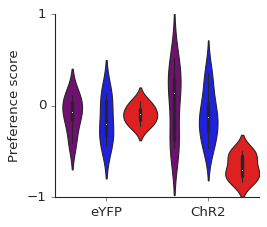

In [ ]:
rtpp = plot_preference_score(filename)
plt.show()

In [ ]:
writer = pd.ExcelWriter('../sourcedata/fig7_LHopto_RTPP-SCT.xlsx', engine='xlsxwriter')

In [ ]:
rtpp.to_excel(writer,sheet_name='RTPP',index=False)

#### SCT

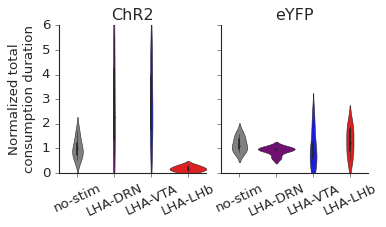

In [ ]:
dur = plot_consumption_measure(filename,'total duration',ylabel='Normalized total\nconsumption duration',ylim=[0,6])
plt.show()

In [ ]:
dur.to_excel(writer,sheet_name='SCTtotalDuration',index=False)

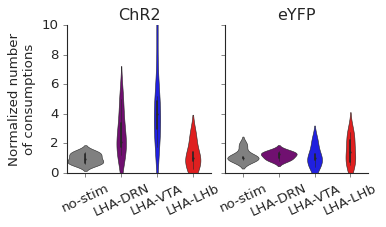

In [ ]:
number = plot_consumption_measure(filename,'number',ylabel='Normalized number\nof consumptions',ylim=[0,10])
plt.show()

In [ ]:
number.to_excel(writer,sheet_name='SCTnumber',index=False)

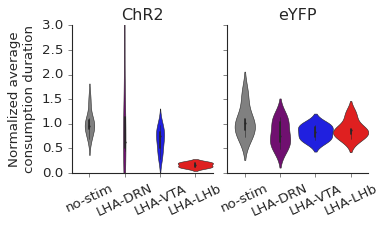

In [ ]:
avgDur = plot_consumption_measure(filename,'duration',ylabel='Normalized average\nconsumption duration',ylim=[0,3])
plt.show()

In [ ]:
avgDur.to_excel(writer,sheet_name='SCTavgDuration',index=False)

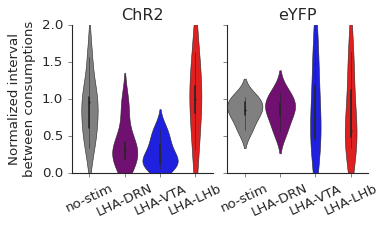

In [ ]:
interval = plot_consumption_measure(filename,'interval',ylabel='Normalized interval\nbetween consumptions',ylim=[0,2])
plt.show()

In [ ]:
interval.to_excel(writer,sheet_name='SCTinterval',index=False)

In [ ]:
writer.save()

#### TST

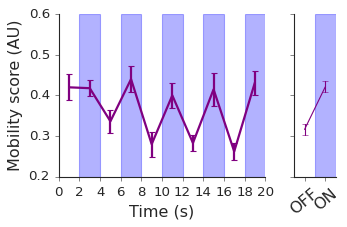

In [ ]:
tst_chr2_drn = plot_movement_byperiods(filename,'TST','ChR2','LHA-DRN',color='purple',ylim=[0.2,0.6],yticks=[0.2,0.3,0.4,0.5,0.6])
plt.show()

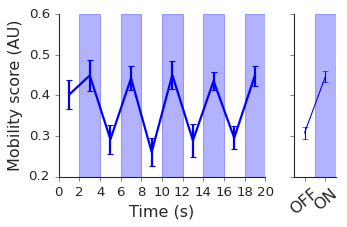

In [ ]:
tst_chr2_vta = plot_movement_byperiods(filename,'TST','ChR2','LHA-VTA',color='blue',ylim=[0.2,0.6],yticks=[0.2,0.3,0.4,0.5,0.6])
plt.show()

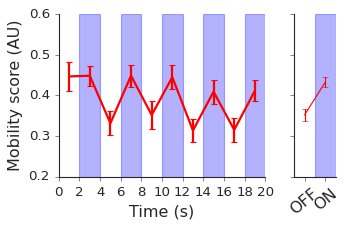

In [ ]:
tst_chr2_lhb = plot_movement_byperiods(filename,'TST','ChR2','LHA-LHb',color='red',ylim=[0.2,0.6],yticks=[0.2,0.3,0.4,0.5,0.6])
plt.show()

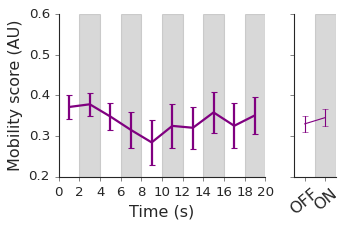

In [ ]:
tst_eyfp_drn = plot_movement_byperiods(filename,'TST','eYFP','LHA-DRN',color='purple',laser_color='grey',ylim=[0.2,0.6],yticks=[0.2,0.3,0.4,0.5,0.6])
plt.show()

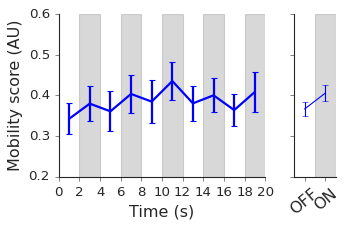

In [ ]:
tst_eyfp_vta = plot_movement_byperiods(filename,'TST','eYFP','LHA-VTA',color='blue',laser_color='grey',ylim=[0.2,0.6],yticks=[0.2,0.3,0.4,0.5,0.6])
plt.show()

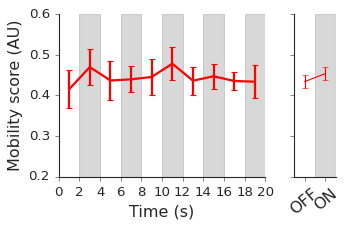

In [ ]:
tst_eyfp_lhb = plot_movement_byperiods(filename,'TST','eYFP','LHA-LHb',color='red',laser_color='grey',ylim=[0.2,0.6],yticks=[0.2,0.3,0.4,0.5,0.6])
plt.show()

#### OFT

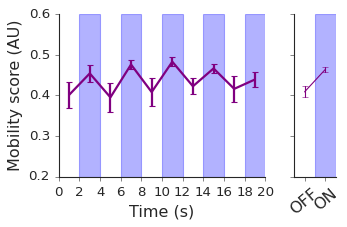

In [ ]:
oft_chr2_drn = plot_movement_byperiods(filename,'OFT','ChR2','LHA-DRN',color='purple',ylim=[0.2,0.6],yticks=[0.2,0.3,0.4,0.5,0.6])
plt.show()

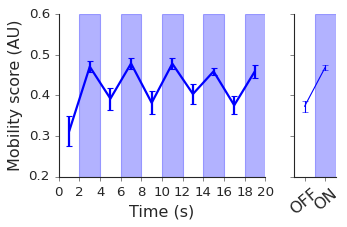

In [ ]:
oft_chr2_vta = plot_movement_byperiods(filename,'OFT','ChR2','LHA-VTA',color='blue',ylim=[0.2,0.6],yticks=[0.2,0.3,0.4,0.5,0.6])
plt.show()

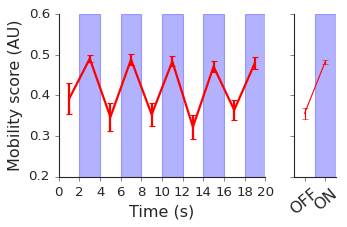

In [ ]:
oft_chr2_lhb = plot_movement_byperiods(filename,'OFT','ChR2','LHA-LHb',color='red',ylim=[0.2,0.6],yticks=[0.2,0.3,0.4,0.5,0.6])
plt.show()

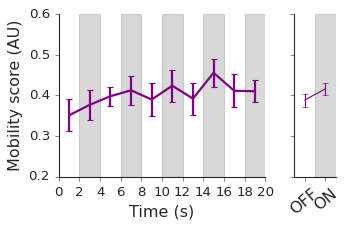

In [ ]:
oft_eyfp_drn = plot_movement_byperiods(filename,'OFT','eYFP','LHA-DRN',color='purple',laser_color='grey',ylim=[0.2,0.6],yticks=[0.2,0.3,0.4,0.5,0.6])
plt.show()

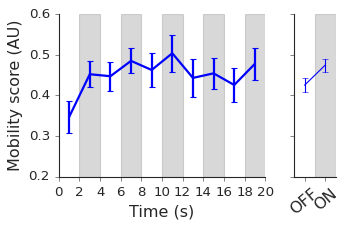

In [ ]:
oft_eyfp_vta = plot_movement_byperiods(filename,'OFT','eYFP','LHA-VTA',color='blue',laser_color='grey',ylim=[0.2,0.6],yticks=[0.2,0.3,0.4,0.5,0.6])
plt.show()

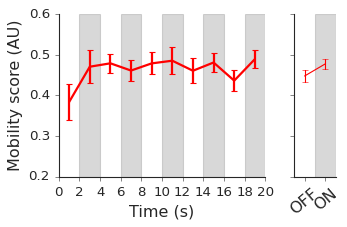

In [ ]:
oft_eyfp_lhb = plot_movement_byperiods(filename,'OFT','eYFP','LHA-LHb',color='red',laser_color='grey',ylim=[0.2,0.6],yticks=[0.2,0.3,0.4,0.5,0.6])
plt.show()

In [ ]:
df = pd.concat([tst_chr2_drn,tst_chr2_vta,tst_chr2_lhb,tst_eyfp_drn,tst_eyfp_vta,tst_eyfp_lhb,
                oft_chr2_drn,oft_chr2_vta,oft_chr2_lhb,oft_eyfp_drn,oft_eyfp_vta,oft_eyfp_lhb])

In [ ]:
df.to_excel('../sourcedata/fig6_LHopto_TST-OFT.xlsx',sheet_name='TST-OFT',index=False)